<a href="https://colab.research.google.com/github/Forcesaj/GA_MLR/blob/main/Implementasi%20Algoritma%20Genetika%20Pada%20prediksi%20harga%20saham%20menggunakan%20Multi%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving BBRI.JK(RAW) - Copy.csv to BBRI.JK(RAW) - Copy.csv


In [2]:
# Import Library yang dibutuhkan
import pandas as pd                      # tabel pandas
import matplotlib.pyplot as plt          # plotting
import numpy as np                       # matrix
import io

df_dataset = pd.read_csv(io.BytesIO(uploaded['BBRI.JK(RAW) - Copy.csv']), names=['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close','Volume'], header=None)
# Menampilkan Data Set
df_dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-14,2125.0,2145.0,2085.0,2135.0,1392.874634,146158000
1,2015-12-15,2130.0,2150.0,2115.0,2150.0,1402.660522,90476500
2,2015-12-16,2175.0,2270.0,2170.0,2270.0,1480.948608,148357500
3,2015-12-17,2310.0,2320.0,2300.0,2310.0,1507.044678,147026000
4,2015-12-18,2245.0,2265.0,2175.0,2175.0,1418.970581,131712000
...,...,...,...,...,...,...,...
1257,2020-12-07,4350.0,4420.0,4350.0,4400.0,4400.000000,140849600
1258,2020-12-08,4400.0,4400.0,4340.0,4400.0,4400.000000,81272000
1259,2020-12-09,4400.0,4400.0,4400.0,4400.0,4400.000000,0
1260,2020-12-10,4450.0,4450.0,4330.0,4330.0,4330.000000,193630600


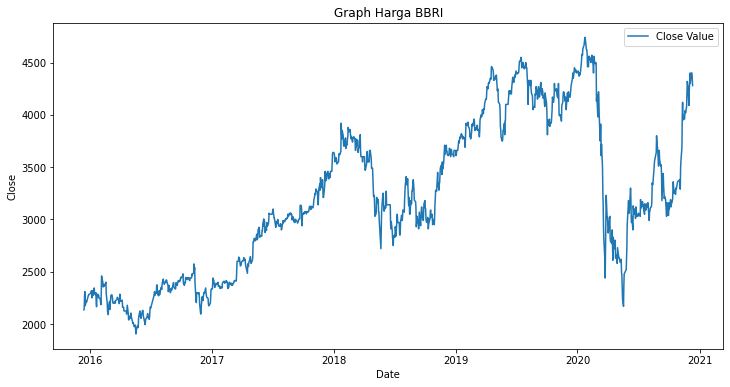

In [3]:
# Visualisasi Graph Harga Saham BBRI dari 2015 - 2020
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt
import csv
import datetime

date=[]
close=[]

for x in range(len(df_dataset)):
  date.append(datetime.datetime.strptime(df_dataset.at[x,'Date'], '%Y-%m-%d'))
  close.append(df_dataset.at[x,'Close'])

plt.figure(figsize=(12,6))
plt.plot(date,close ,label='Close Value')
plt.xlabel('Date')
plt.ylabel('Close')

plt.title('Graph Harga BBRI')
plt.legend()
plt.show()

In [4]:
#Membuat Data Random
import random
# jumlah baris
SLIDE_WINDOWS = 5
# jumlah kolom (genapkan agar dapat digunakan untuk crossover)
POP_SIZE = 1200
# +1
GENE_LENGTH = SLIDE_WINDOWS + 1

populasi = []

# membuat jumlah individu sesuai jumlah awal populasi
for x in range(POP_SIZE):
    individu = {}
    # membuat nilai random untuk setiap gen
    for y in range(GENE_LENGTH):      
      individu['indv'+ str(y)] = random.random()
    populasi.append(individu)

# menampilkan populasi
df_koef = pd.DataFrame(list(populasi))
df_koef

,indv0,indv1,indv2,indv3,indv4,indv5
0,0.999606,0.979902,0.868356,0.995215,0.333325,0.223385
1,0.561547,0.032874,0.162933,0.488357,0.124821,0.145435
2,0.328421,0.309087,0.199794,0.007263,0.041144,0.980407
3,0.985288,0.955898,0.615760,0.699826,0.050986,0.960626
4,0.546111,0.204205,0.686050,0.289618,0.909521,0.913548
...,...,...,...,...,...,...
1195,0.922037,0.808427,0.960416,0.785346,0.449412,0.188025
1196,0.521164,0.147505,0.597698,0.664492,0.395735,0.314847
1197,0.148567,0.500359,0.009246,0.182357,0.236754,0.341210
1198,0.354449,0.771755,0.494857,0.122486,0.869133,0.621426


In [5]:
# Fitness Value

# Multi Linear Regression / MLR
from decimal import *
getcontext().prec = 5

# function menghitung Multi Linear Regression
def get_MLR(index_individu, hari_mulai):

  MLR = df_koef.iat[index_individu,0]
  # MLR = koefisien 0
  hari_ke = hari_mulai

  for y in range(SLIDE_WINDOWS):
    # MLR = MLR + kefisien * data    
    MLR = MLR + df_koef.iat[index_individu,y+1] * df_dataset.at[hari_ke,'Close']
    hari_ke += 1
  #iat mengambil value spesifik di kolom brp baris brp
  return MLR
#===============================================================================

# MSE
def get_MSE(index_individu) :
  total_square_error = 0
  end = len(df_dataset) - SLIDE_WINDOWS

  for x in range(end):
    # menghitung square error
    square_error = np.power( get_MLR(index_individu,x) - df_dataset.at[x + SLIDE_WINDOWS,'Close'], 2)
    total_square_error += square_error
  
  mse = (1 / (len(df_dataset) - SLIDE_WINDOWS)) * total_square_error
  return mse
# ==============================================================================

# Fitness Value 
fitness_individu = []
end = len(df_koef)

for z in range(end) :
  fitness = 1 / (get_MSE(z) + 1 )
  fitness_individu.append(fitness)
# ==============================================================================

# Visualisasi data frame(koefisien + fitness)  
df_individu = df_koef.assign(fitness = fitness_individu) 
df_individu

,indv0,indv1,indv2,indv3,indv4,indv5,fitness
0,0.999606,0.979902,0.868356,0.995215,0.333325,0.223385,1.602224e-08
1,0.561547,0.032874,0.162933,0.488357,0.124821,0.145435,3.011573e-05
2,0.328421,0.309087,0.199794,0.007263,0.041144,0.980407,3.190888e-07
3,0.985288,0.955898,0.615760,0.699826,0.050986,0.960626,1.770221e-08
4,0.546111,0.204205,0.686050,0.289618,0.909521,0.913548,2.298053e-08
...,...,...,...,...,...,...,...
1195,0.922037,0.808427,0.960416,0.785346,0.449412,0.188025,1.921663e-08
1196,0.521164,0.147505,0.597698,0.664492,0.395735,0.314847,7.352134e-08
1197,0.148567,0.500359,0.009246,0.182357,0.236754,0.341210,1.262609e-06
1198,0.354449,0.771755,0.494857,0.122486,0.869133,0.621426,2.611744e-08


In [6]:
# Menghitung Probabilitas
total_fitness = df_individu['fitness'].sum()
list_probabilitas = []
#probabilitas = fitness / total fitness
for x in range(len(df_individu)):
  nilai_probabilitas = df_individu.at[x,'fitness'] / total_fitness
  list_probabilitas.append(nilai_probabilitas)
  
# menampilkan data frame (individu + probabilitas)
df_individu = df_individu.assign(probabilitas = list_probabilitas)
df_individu

,indv0,indv1,indv2,indv3,indv4,indv5,fitness,probabilitas
0,0.999606,0.979902,0.868356,0.995215,0.333325,0.223385,1.602224e-08,0.000023
1,0.561547,0.032874,0.162933,0.488357,0.124821,0.145435,3.011573e-05,0.042721
2,0.328421,0.309087,0.199794,0.007263,0.041144,0.980407,3.190888e-07,0.000453
3,0.985288,0.955898,0.615760,0.699826,0.050986,0.960626,1.770221e-08,0.000025
4,0.546111,0.204205,0.686050,0.289618,0.909521,0.913548,2.298053e-08,0.000033
...,...,...,...,...,...,...,...,...
1195,0.922037,0.808427,0.960416,0.785346,0.449412,0.188025,1.921663e-08,0.000027
1196,0.521164,0.147505,0.597698,0.664492,0.395735,0.314847,7.352134e-08,0.000104
1197,0.148567,0.500359,0.009246,0.182357,0.236754,0.341210,1.262609e-06,0.001791
1198,0.354449,0.771755,0.494857,0.122486,0.869133,0.621426,2.611744e-08,0.000037


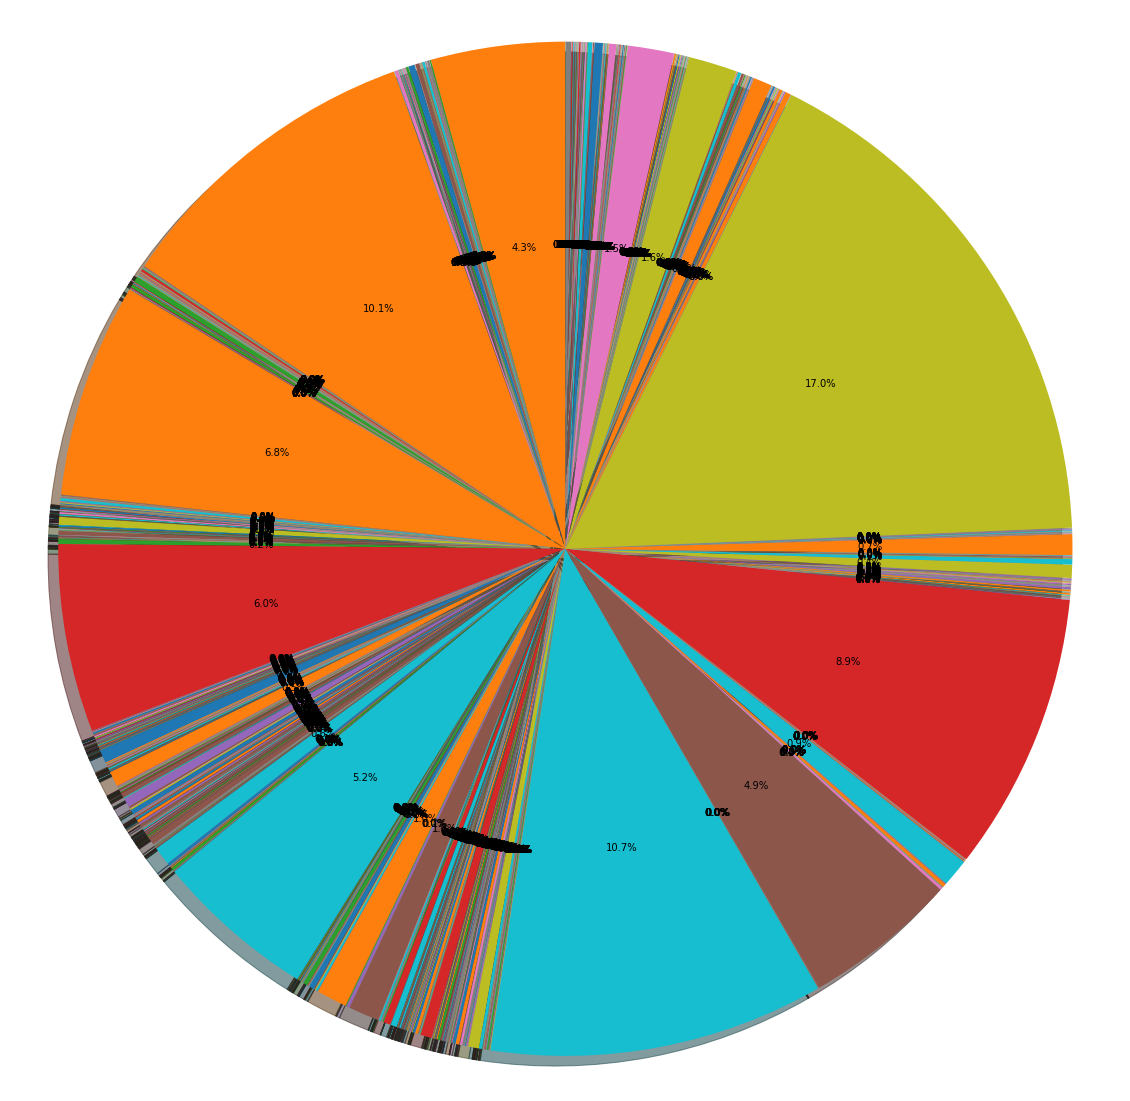

In [7]:
# Visualisasi menggunakan roulete wheel
sizes = df_individu['probabilitas']

fig1, ax1 = plt.subplots(figsize=(20,20))
ax1.pie(sizes,  autopct='%1.1f%%',
        shadow=True, startangle=90)
# Dibuat equal agar chartnya dalam bentuk lingkaran
ax1.axis('equal')  

plt.show()

In [8]:
# Selection
def get_select(df_populasi):
  
  r = random.random()
  #pointer pada roulette wheel
  partialsum = 0
  #populasi = perbaris
  for x in range(len(df_populasi)):
    #populasi idx0-idx500
    partialsum += df_populasi.at[x,'probabilitas']
    
    if partialsum > r:
      return x

terpilih = []
#individu = perkolom
for y in range(len(df_individu)):
  pilih = get_select(df_individu)
  terpilih.append(pilih)

series_terpilih = pd.Series(terpilih)

# menampilkan individu terpilih / generasi baru Z

generasi_baru = []

for z in range(len(series_terpilih)):
  generasi_baru.append(df_individu.iloc[series_terpilih[z]])

generasi_baru = pd.DataFrame(generasi_baru).reset_index(drop=True)
generasi_baru

,indv0,indv1,indv2,indv3,indv4,indv5,fitness,probabilitas
0,0.788698,0.393324,0.439486,0.106390,0.057137,0.141260,4.654155e-06,0.006602
1,0.342488,0.258924,0.105235,0.125714,0.164646,0.368914,7.521820e-05,0.106701
2,0.017342,0.910864,0.597468,0.276989,0.101667,0.116870,9.172127e-08,0.000130
3,0.243769,0.111695,0.181219,0.078126,0.317596,0.303480,1.197241e-04,0.169835
4,0.691676,0.048647,0.422837,0.085172,0.366622,0.096747,7.122439e-05,0.101036
...,...,...,...,...,...,...,...,...
1195,0.676989,0.829209,0.943883,0.766621,0.185354,0.818001,1.426808e-08,0.000020
1196,0.800619,0.573760,0.020375,0.166570,0.161447,0.095632,6.253835e-05,0.088714
1197,0.342488,0.258924,0.105235,0.125714,0.164646,0.368914,7.521820e-05,0.106701
1198,0.342488,0.258924,0.105235,0.125714,0.164646,0.368914,7.521820e-05,0.106701


In [9]:
# Crossover
# tentukan nilai alpha
alpha = 0.4
# offspring = child
list_child = []

# whole arithmetic crossover
def cross_over(parent1,parent2,list_child):
  
  child1 = {}
  for x in range(SLIDE_WINDOWS+1):
    child1['indv'+ str(x)] = alpha*parent1.iat[x] + (1-alpha)*parent2.iat[x]
  list_child.append(child1)

  child2 = {}
  for x in range(SLIDE_WINDOWS+1):
    child2['indv'+ str(x)] = alpha*parent2.iat[x] + (1-alpha)*parent1.iat[x]
  list_child.append(child2)

#prob cross 
probabilitas_crossover = 0.6
jumlah_parent = round(len(generasi_baru) * probabilitas_crossover)
#=========================================================================

#proses crossover
for x in range(jumlah_parent):
  #jika ganjil jadi parent 1
  if ((x+1) % 2) == 1:
    parent1 = generasi_baru.iloc[x]
  #jika genap jadi parent 2
  if ((x+1) % 2) == 0:
    parent2 = generasi_baru.iloc[x]
    #jika sudah memiliki 2 parent baru bisa di crossover
    cross_over(parent1,parent2,list_child)

hasil_child = pd.DataFrame(list_child)

#update generasi baru 
generasi_baru = generasi_baru.drop("fitness", axis=1)
generasi_baru = generasi_baru.drop("probabilitas", axis=1)
generasi_baru.update(hasil_child)
#visualisasi generasi baru
print(generasi_baru)

         indv0     indv1     indv2     indv3     indv4     indv5
0     0.520972  0.312684  0.238936  0.117984  0.121642  0.277853
1     0.610214  0.339564  0.305786  0.114120  0.100140  0.232322
2     0.153198  0.431362  0.347719  0.157671  0.231225  0.228836
3     0.107913  0.591196  0.430968  0.197444  0.188039  0.191514
4     0.482163  0.174813  0.232276  0.109497  0.245436  0.260047
...        ...       ...       ...       ...       ...       ...
1195  0.676989  0.829209  0.943883  0.766621  0.185354  0.818001
1196  0.800619  0.573760  0.020375  0.166570  0.161447  0.095632
1197  0.342488  0.258924  0.105235  0.125714  0.164646  0.368914
1198  0.342488  0.258924  0.105235  0.125714  0.164646  0.368914
1199  0.008866  0.012888  0.007076  0.022358  0.130165  0.989837

[1200 rows x 6 columns]


In [10]:
# Mutasi
probabilitas_jumlah_terpilih = 0.1
banyak_yang_terpilih = round(POP_SIZE * probabilitas_jumlah_terpilih)

# memilih individu secara random
indeks_terpilih = []

for x in range(banyak_yang_terpilih):
  r = random.randint(0, len(generasi_baru)-1)
  if (x) == 0:    
    indeks_terpilih.append(r)
  else:
    # untuk menghindari nilai yang sama
    while r in indeks_terpilih:
      r = random.randint(0, len(generasi_baru)-1)
    indeks_terpilih.append(r)
# ==============================================================================

# function mutasi
for x in range(len(indeks_terpilih)):
  # menentukan index gen yang dirubah
  igen_change = random.randint(0, GENE_LENGTH-1)
  
  # angka random dari 0.1 - 1.1 (pengubah nilai gen)
  gene_changer = random.uniform(0.1, 1.1)
  
  # Mutasi Gen
  mutated_gen = generasi_baru.iloc[indeks_terpilih[x],igen_change] * gene_changer
  
  # Update Gen yang telah bermutasi
  generasi_baru.iloc[indeks_terpilih[x],igen_change] = mutated_gen

print(generasi_baru)

         indv0     indv1     indv2     indv3     indv4     indv5
0     0.520972  0.312684  0.238936  0.117984  0.121642  0.277853
1     0.610214  0.339564  0.305786  0.061283  0.100140  0.232322
2     0.153198  0.431362  0.347719  0.157671  0.231225  0.228836
3     0.107913  0.591196  0.430968  0.197444  0.188039  0.191514
4     0.482163  0.174813  0.232276  0.109497  0.245436  0.260047
...        ...       ...       ...       ...       ...       ...
1195  0.676989  0.829209  0.943883  0.766621  0.185354  0.818001
1196  0.800619  0.573760  0.020375  0.166570  0.161447  0.095632
1197  0.342488  0.258924  0.105235  0.125714  0.164646  0.368914
1198  0.342488  0.258924  0.105235  0.125714  0.164646  0.368914
1199  0.008866  0.012888  0.007076  0.022358  0.130165  0.989837

[1200 rows x 6 columns]


In [11]:
# Elitism

# menghitung fitness 
fitness_individu = []

end = len(df_koef)

for z in range(end) :
  fitness = 1 / (get_MSE(z) + 1 )
  fitness_individu.append(fitness)

# membuat data frame (data koefisien + fitness)
generasi_baru = generasi_baru.assign(fitness = fitness_individu) 

# etilism dengan metode holland (state update)=================================
# menghapus probabilitas sebelumnya (axis = 0 baris, 1 kolom)
df_individu = df_individu.drop(['probabilitas'], axis=1)

# menggabungkan populasi lama dengan yang baru
df_individu = df_individu.append(generasi_baru)

# rangking individu sesuai fitness
df_individu = df_individu.sort_values(by='fitness', ascending=False).reset_index(drop=True)

#hanya ambil individu sebanyak populasi size
df_individu = df_individu[:POP_SIZE]


#df_individu = generasi_baru
print(df_individu)

         indv0     indv1     indv2     indv3     indv4     indv5       fitness
0     0.226786  0.111695  0.181219  0.078126  0.317596  0.303480  1.197241e-04
1     0.243769  0.111695  0.181219  0.078126  0.317596  0.303480  1.197241e-04
2     0.342488  0.258924  0.105235  0.125714  0.164646  0.368914  7.521820e-05
3     0.312666  0.099735  0.094420  0.079616  0.520610  0.250842  7.521820e-05
4     0.303000  0.200032  0.135629  0.106679  0.225826  0.342741  7.122439e-05
...        ...       ...       ...       ...       ...       ...           ...
1195  0.958195  0.613442  0.254979  0.548566  0.208933  0.875402  4.092990e-08
1196  0.067249  0.450702  0.242677  0.767829  0.979354  0.062748  4.083266e-08
1197  0.607599  0.162034  0.273017  0.132924  0.373028  0.044386  4.083266e-08
1198  0.913531  0.626394  0.752947  0.987495  0.029831  0.109114  4.071937e-08
1199  0.636323  0.142059  0.218448  0.209335  0.193468  0.227633  4.071937e-08

[1200 rows x 7 columns]


In [12]:
# menampilkan individu terbaik
best_kromosom = df_individu.iloc[0]
best_kromosom

indv0      0.226786
indv1      0.111695
indv2      0.181219
indv3      0.078126
indv4      0.317596
indv5      0.303480
fitness    0.000120
Name: 0, dtype: float64

In [13]:
# Iterasi
# tentukan banyaknya iterasi
ITERATE = 20
#fitness yang diharapkan
CONSTRAINT_FITNESS = 0.8

# fungsi hitung fitness
def get_fitness(df_koef):
  
  # menghitung fitness 
  fitness_individu = []
  end = len(df_koef)

  for z in range(end) :
    fitness = 1 / (get_MSE(z) + 1 )
    fitness_individu.append(fitness)

  # membuat data frame individu yaitu data koefisien + fitness
  df_koef = df_koef.assign(fitness = fitness_individu) 
  return df_koef
# ==============================================================================

# fungsi hitung probabilitas
def get_probabilitas(df_individu):
  
  total_fitness = df_individu['fitness'].sum()
  list_probabilitas = []

  for x in range(len(df_individu)):
    nilai_probabilitas = df_individu.at[x,'fitness'] / total_fitness
    list_probabilitas.append(nilai_probabilitas)

  # membuat data frame individu yaitu data koefisien + fitness
  df_individu = df_individu.assign(probabilitas = list_probabilitas)
  return df_individu
# ==============================================================================

#fungsi seleksi
def get_seleksi(df_individu):
  
  terpilih = []

  for y in range(len(df_individu)):
    pilih = get_select(df_individu)
    terpilih.append(pilih)

  series_terpilih = pd.Series(terpilih)
  # menampilkan individu terpilih
  series_terpilih
  generasi_baru = []

  for z in range(len(series_terpilih)):
    generasi_baru.append(df_individu.iloc[series_terpilih[z]])

  generasi_baru = pd.DataFrame(generasi_baru).reset_index(drop=True)
  return generasi_baru
#===============================================================================

# fungsi crossover
def get_crossover(generasi_baru):
  
  #tentukan nilai alpha
  alpha = 0.4
  list_child = []

  #melakukan crossover
  for x in range(len(generasi_baru)):
    
    #jika ganjil jadi parent 1
    if ((x+1) % 2) == 1:
      parent1 = generasi_baru.iloc[x]
      
    #jika ganjil jadi parent 2
    if ((x+1) % 2) == 0:      
      parent2 = generasi_baru.iloc[x]
      #jika parent sudah 2 bisa di crossover
      cross_over(parent1,parent2,list_child)

  generasi_baru = pd.DataFrame(list_child)
  return generasi_baru
#===============================================================================

# fungsi mutasi 
def mutation(generasi_baru, probabilitas, banyak_poppulasi, panjang_gen):
  
  probabilitas_jumlah_terpilih = probabilitas
  banyak_yang_terpilih = round(banyak_poppulasi * probabilitas_jumlah_terpilih)

  # memilih individu =============================
  indeks_terpilih = []

  for x in range(banyak_yang_terpilih):    
    r = random.randint(0, len(generasi_baru)-1)
    
    if (x) == 0:    
      indeks_terpilih.append(r)
    else:
      # untuk menghindari duplikat
      while r in indeks_terpilih:
        r = random.randint(0, len(generasi_baru)-1)
        
      indeks_terpilih.append(r)


  # mutasi ========================================
  for x in range(len(indeks_terpilih)):
    #menentukan index gene yang dirubah
    igen_change = random.randint(0, panjang_gen-1)

    #angka random dari 0.1 - 1.1 (pengubah nilai gen)
    gene_changer = random.uniform(0.1, 1.1)

    #merubah gen
    mutated_gen = generasi_baru.iloc[indeks_terpilih[x],igen_change] * gene_changer

    #update gene
    generasi_baru.iloc[indeks_terpilih[x],igen_change] = mutated_gen
    return generasi_baru
#===============================================================================

# fungsi elitism
def elitism(populasi_lama, generasi_baru):
  populasi_lama = generasi_baru
  # menghitung fitness
  populasi_lama = get_fitness(populasi_lama)
  return populasi_lama

def elitism_update(populasi_lama, generasi_baru):
  
  # menghitung fitness
  generasi_baru = get_fitness(generasi_baru)
  
  # elitism dengan metode state update ============================================
  #mengahpus probabilitas sebelumnya (axis = 0 baris, 1 kolom)
  populasi_lama = populasi_lama.drop(['probabilitas'], axis=1)

  # menggabungkan populasi lama dengan yang baru
  populasi_lama = populasi_lama.append(generasi_baru)

  # rangking individu sesuai fitness
  populasi_lama = populasi_lama.sort_values(by='fitness', ascending=False).reset_index(drop=True)

  #hanya ambil individu sebanyak populasi size
  populasi_lama = populasi_lama[:POP_SIZE]
  
  return populasi_lama

#===============================================================================

def get_best(df_individu):
  best_kromosom = df_individu.iloc[0]                             
  return best_kromosom
#===============================================================================
# Kondisi Iterasi
i = 0
while (i < ITERATE) and (best_kromosom['fitness'] < CONSTRAINT_FITNESS):
  
  # menghitung probabilitas
  df_individu = get_probabilitas(df_individu)
  
  # seleksi individu
  generasi_baru = get_seleksi(df_individu)
  
  # crossover
  generasi_baru = get_crossover(generasi_baru)
  
  #mutasi
  generasi_baru = mutation(generasi_baru, 0.2, POP_SIZE, GENE_LENGTH)
  
  #etilism
  df_individu = elitism_update(df_individu, generasi_baru)
  
  #best individu
  best_kromosom = get_best(df_individu)
  
  i += 1
  
#df_individu = get_fitness(df_individu)
df_individu

,indv0,indv1,indv2,indv3,indv4,indv5,fitness
0,0.226786,0.111695,0.181219,0.078126,0.317596,0.303480,1.197241e-04
1,0.496782,0.181383,0.180055,0.193592,0.227558,0.224169,1.197241e-04
2,0.588859,0.220542,0.197025,0.220143,0.288929,0.195874,1.197241e-04
3,0.243769,0.111695,0.181219,0.078126,0.317596,0.303480,1.197241e-04
4,0.238135,0.139425,0.140213,0.078770,0.267238,0.368748,1.197241e-04
...,...,...,...,...,...,...,...
1195,0.540969,0.088864,0.236659,0.178963,0.297902,0.209618,6.397056e-07
1196,0.309989,0.149836,0.163055,0.119519,0.278614,0.283109,6.397056e-07
1197,0.384705,0.164352,0.166550,0.149078,0.359324,0.213794,6.397056e-07
1198,0.305099,0.143556,0.174309,0.066198,0.337118,0.319571,6.397056e-07


In [14]:
# menampilkan individu terbaik berdasarkan fitness value
result = df_individu.sort_values(by='fitness', ascending=False).reset_index(drop=True)
best_kromosom = result.iloc[0]
print('individu terbaik yaitu :')
print(best_kromosom)
print('dari :')
print(result)

individu terbaik yaitu :
indv0      0.226786
indv1      0.111695
indv2      0.181219
indv3      0.078126
indv4      0.317596
indv5      0.303480
fitness    0.000120
Name: 0, dtype: float64
dari :
         indv0     indv1     indv2     indv3     indv4     indv5       fitness
0     0.226786  0.111695  0.181219  0.078126  0.317596  0.303480  1.197241e-04
1     0.333276  0.110260  0.173131  0.091720  0.395381  0.269348  1.197241e-04
2     0.496782  0.181383  0.180055  0.193592  0.227558  0.224169  1.197241e-04
3     0.344738  0.195586  0.356862  0.148447  0.228512  0.330543  1.197241e-04
4     0.403484  0.170608  0.180095  0.177954  0.304805  0.233440  1.197241e-04
...        ...       ...       ...       ...       ...       ...           ...
1195  0.368977  0.165596  0.215120  0.116228  0.308870  0.200877  6.397056e-07
1196  0.510731  0.309635  0.119952  0.107555  0.280325  0.245481  6.397056e-07
1197  0.436996  0.139249  0.147964  0.184141  0.378544  0.181635  6.397056e-07
1198  0.522695

In [15]:
# Prediksi menggunakan hasil klasifikasi Algen
list_prediksi = []
end = len(df_dataset) - SLIDE_WINDOWS

# menghitung MLR
for x in range(end):
  
  MLR = best_kromosom[0]
  hari_mulai = x
  
  for y in range(SLIDE_WINDOWS):
    #MLR menggunakan individu terbaik dan data set
    MLR = MLR + best_kromosom[y+1] * df_dataset.at[hari_mulai,'Close']
    hari_mulai += 1
  
  list_prediksi.append(MLR)
# ====================================================================

# menghitung mse 
total_square_error = 0
end = len(df_dataset) - SLIDE_WINDOWS

for x in range(end):
  # menghitung square error list prediksi/MLR
  square_error = np.power( list_prediksi[x] - df_dataset.at[x + SLIDE_WINDOWS,'Close'], 2)
  total_square_error += square_error
  
mse = (1 / len(list_prediksi)) * total_square_error
# ====================================================================
# menampilkan hasil prediksi
print(list_prediksi)
print('mse : ' + str(mse))

[2199.379434373437, 2196.7073064856077, 2218.0694509126224, 2201.4471191394423, 2215.1267222818574, 2238.1778326353037, 2245.078047655544, 2261.6909416847393, 2278.028810453667, 2283.0332987558163, 2267.099128948474, 2274.8349915164945, 2279.534908151491, 2273.2844764356764, 2290.6028002102403, 2301.369219480758, 2295.746354172784, 2282.2231597961086, 2285.3503432835696, 2253.398315436859, 2204.6239988472394, 2215.516146399148, 2234.581757430154, 2226.0418638330784, 2237.398374116261, 2248.1112668715473, 2238.6461993833095, 2235.030991146083, 2219.6460969061523, 2197.174178668367, 2215.969323491573, 2291.956069881433, 2328.7270452614152, 2324.9887359109057, 2356.5067650623087, 2363.507213297771, 2350.349061197218, 2356.1325205809558, 2361.513376507279, 2367.96029182898, 2341.6317101905447, 2280.669813505396, 2221.5139521909127, 2176.0072429148054, 2131.752882636609, 2118.708882203998, 2148.598716319021, 2139.9001964147506, 2145.758831904286, 2185.0794172654673, 2205.583623484936, 2225.

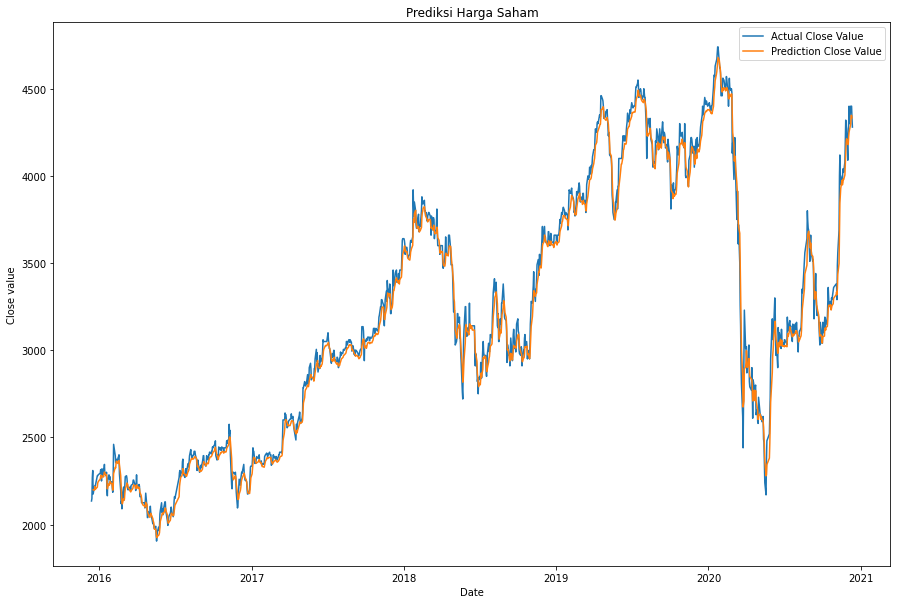

In [16]:
# Visualisasi hasil prediksi
grafik = []

indeks_prediksi = 0

# Memanggil data tanggal sebelumnya
for x in range(SLIDE_WINDOWS-1,len(df_dataset)-1):
  
  temp = {'Date': datetime.datetime.strptime(df_dataset.at[x,'Date'], '%Y-%m-%d'),'Close':list_prediksi[indeks_prediksi]}
  indeks_prediksi += 1 
  grafik.append(temp)

df_prediksi = pd.DataFrame(list(grafik))

#print(df_prediksi['Close'])

date=[]
close=[]

for x in range(len(df_dataset)):
  date.append(datetime.datetime.strptime(df_dataset.at[x,'Date'], '%Y-%m-%d'))
  close.append(df_dataset.at[x,'Close'])


plt.figure(figsize=(15,10))
plt.plot(date, close, label='Actual Close Value')
#plt.ylabel('Prediction Close')

plt.plot(df_prediksi['Date'], df_prediksi['Close'], label='Prediction Close Value')
plt.xlabel('Date')
plt.ylabel('Close value')
#plt.ylabel('Prediction Close')

plt.title('Prediksi Harga Saham')
plt.legend()
plt.show()